In [1]:
import pandas as pd
import requests
import json
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
sns.set(color_codes=True)

%matplotlib inline

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
with open('recipes_dict1.json', 'r') as file:
    recipes_dict = json.loads(file.read())

#### Transform dictionary into a DataFrame

In [3]:
recipes_df = pd.DataFrame.from_dict(recipes_dict, orient='columns', dtype=None).T.fillna(0)

In [4]:
recipes_df['calories'] = recipes_df[['calories']].apply(pd.to_numeric)
recipes_df['carbohydrates'] = recipes_df[['carbohydrates']].apply(pd.to_numeric)
recipes_df['protein'] = recipes_df[['protein']].apply(pd.to_numeric)
recipes_df['serving'] = recipes_df[['serving']].apply(pd.to_numeric)
recipes_df['cholesterol'] = recipes_df[['cholesterol']].apply(pd.to_numeric)
recipes_df['sodium'] = recipes_df[['sodium']].apply(pd.to_numeric)

In [5]:
cooking_time = [x for x in recipes_df['cooking_time']]
cooking_time_corrected = []
for i in cooking_time:
    try:
        i = int(i)
        if i < 7:
            i = i * 60
    except:
        i = 0
    cooking_time_corrected.append(i)
#for i in cooking_time_corrected:
    
recipes_df['cooking_time'] = cooking_time_corrected

In [6]:
attributes = [x for x in recipes_df.columns]
len(attributes)

331

In [7]:
df_reduced = recipes_df[recipes_df.rating > 0][recipes_df.calories > 10][recipes_df.carbohydrates > 10][recipes_df.protein > 1][recipes_df.serving > 0][recipes_df.sodium > 1][recipes_df.reviews_count > 0][recipes_df.make_it_again > 0][recipes_df.date != 0][recipes_df.cooking_time > 0]

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [8]:
#Eliminate 
ingredients_count = df_reduced.drop(['calories', 'carbohydrates', 'protein', 'rating', 'serving', 'url', 'cholesterol','sodium', 'reviews_count', 'make_it_again', 'date', 'cooking_time','cooking_time'], axis = 1).apply(pd.value_counts).fillna(0)[1:].T
ingredients_count.columns = ['qty']
top_ingredients = ingredients_count.sort_values(by = ['qty'], ascending = False).head(200)

In [9]:
recipes_df_reduced = df_reduced[['calories', 'carbohydrates', 'protein', 'rating', 'serving', 'url', 'cholesterol','sodium', 'reviews_count', 'make_it_again', 'date', 'cooking_time']]
df_top_ingredients = df_reduced[top_ingredients.index]

In [10]:
df_pre = pd.merge(recipes_df_reduced, df_top_ingredients, left_index=True, right_index=True)

In [11]:
df_pre['success_score'] = df_pre['rating'] * df_pre['make_it_again']

In [12]:
with open('df_pre.pkl', 'wb') as picklefile:
    pickle.dump(df_pre, picklefile)

In [13]:
with open('df_pre1.pkl', 'wb') as picklefile:
    pickle.dump(df_pre, picklefile)

In [14]:
top_recipes = df_pre.sort_values(by = ['success_score'], ascending = False).head(100)
botton_recipes = df_pre.sort_values(by = ['success_score'], ascending = True).head(100)

In [15]:
top_recipes_1 = top_recipes[['success_score','rating','calories', 'carbohydrates', 'protein', 'cholesterol','sodium']].describe()
top_recipes_2 = top_recipes.drop(['rating','success_score','url','reviews_count','calories', 'carbohydrates', 'protein', 'cholesterol','sodium','serving','make_it_again','date','cooking_time'], axis =1)
top_recipes_mean = top_recipes_1.loc['mean'].append(top_recipes_2.sum())

In [38]:
botton_recipes_1 = botton_recipes[['success_score','rating','calories', 'carbohydrates', 'protein', 'cholesterol','sodium']].describe()
botton_recipes_2 = botton_recipes.drop(['rating','success_score','url','reviews_count','calories', 'carbohydrates', 'protein', 'cholesterol','sodium','serving','make_it_again','date','cooking_time'], axis =1)
botton_recipes_mean = botton_recipes_1.loc['mean'].append(botton_recipes_2.sum())

In [45]:
comparison = pd.DataFrame
comparison.index = top_recipes_mean
comparison.index = top_recipes_mean[:len(comparison.index)]
#comparison['Top_recipes'] = top_recipes_mean
#comparison['top_recipe'] = top_recipes_mean

In [17]:
df_pre = df_pre[df_pre.rating > 0][df_pre.calories > 50][df_pre.calories < df_pre.calories.quantile(0.99)][df_pre.carbohydrates > 1][df_pre.carbohydrates < df_pre.carbohydrates.quantile(0.99)][df_pre.protein > 1][df_pre.protein < df_pre.protein.quantile(0.99)][df_pre.cholesterol > 1][df_pre.serving > 0][df_pre.sodium > 1][df_pre.sodium < df_pre.sodium.quantile(0.99)][df_pre.reviews_count > 0][df_pre.make_it_again > 0][df_pre.date != 0][df_pre.cooking_time > 7][df_pre.cooking_time < df_pre.cooking_time.quantile(0.99)][df_pre.reviews_count > 1]
df_pre.describe()

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,calories,carbohydrates,protein,rating,serving,cholesterol,sodium,reviews_count,make_it_again,cooking_time,...,Coffee,Port,Mussel,Orange Juice,Cod,Okra,Fig,Quinoa,Trout,success_score
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,605.855556,42.520202,29.121212,3.387879,4.624242,129.832323,764.467677,28.708081,0.861081,62.304040,...,0.003030,0.003030,0.005051,0.002020,0.005051,0.005051,0.004040,0.003030,0.004040,2.952535
std,352.068862,26.717545,21.065679,0.421915,2.016669,111.934511,552.291812,47.055231,0.142225,52.562693,...,0.054992,0.054992,0.070923,0.044924,0.070923,0.070923,0.063468,0.054992,0.063468,0.711035
min,73.000000,11.000000,2.000000,1.500000,1.000000,2.000000,8.000000,2.000000,0.210000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315000
25%,359.750000,23.000000,13.000000,3.000000,4.000000,46.000000,331.000000,7.000000,0.800000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.555000
50%,543.000000,36.000000,26.000000,3.500000,4.000000,105.000000,661.500000,16.000000,0.900000,45.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.080000
75%,765.250000,57.000000,41.000000,3.500000,6.000000,183.750000,1066.250000,34.000000,0.970000,60.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.430000
max,2802.000000,197.000000,139.000000,4.000000,9.000000,905.000000,3711.000000,731.000000,1.000000,240.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


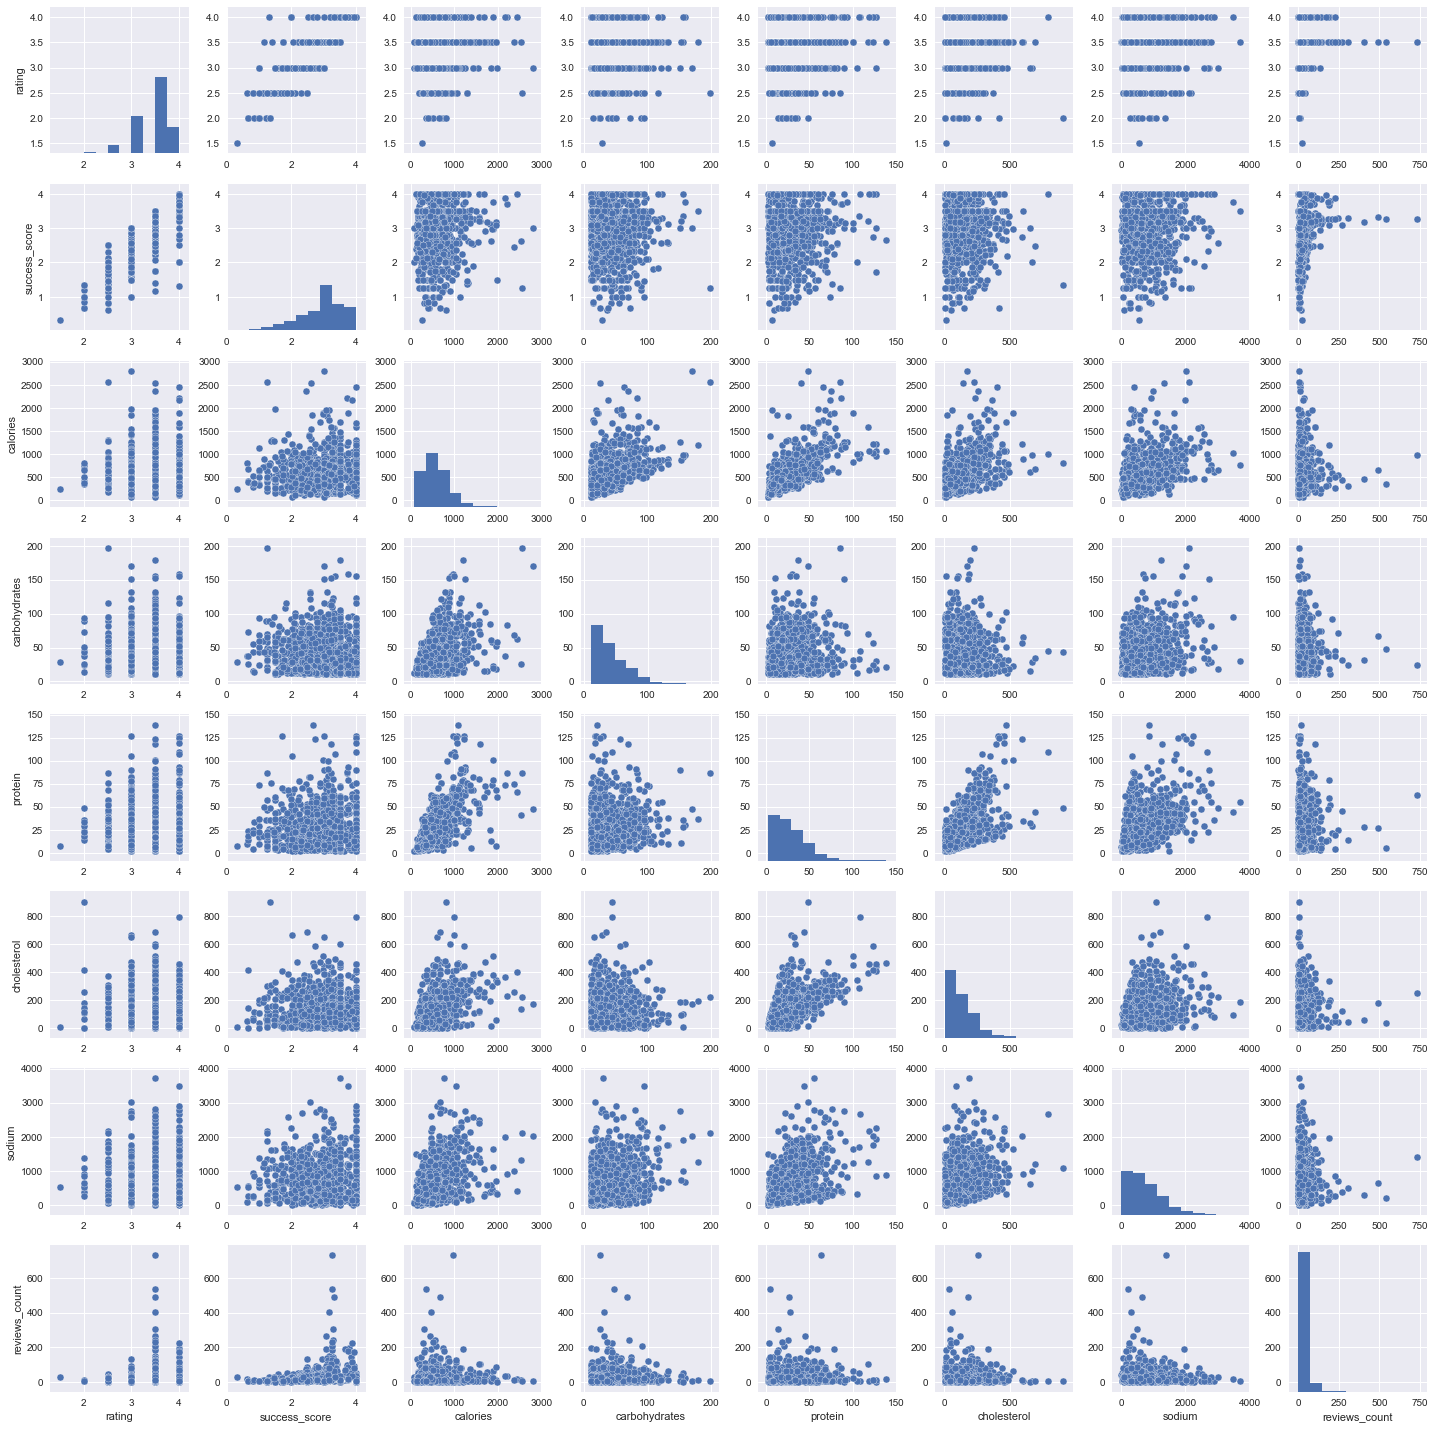

In [18]:
sns.pairplot(df_pre[['rating','success_score','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'reviews_count']])

## Features Selection

In [19]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE
X = df_pre.drop(['rating','url','date','make_it_again','success_score'], axis =1)
y = df_pre['rating']

model = LinearRegression()
# create the RFE model and select 70 features
rfe = RFE(model, 70)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
selected_features_ranking = list(zip(X.columns,rfe.support_,rfe.ranking_))

In [20]:
#create a new dataframe with only features selected by RFE
selected_features = [i[0] for i in selected_features_ranking if i[1] == True]
selected_features_df = pd.DataFrame()
for i in selected_features:
    selected_features_df[i] = df_pre[i]

In [21]:
df = pd.merge(df_pre[['success_score','rating','url','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'reviews_count','cooking_time']].reset_index(), selected_features_df.reset_index(), on = 'index', how='inner').set_index('index')
df.dropna(inplace=True)

In [22]:
df['log_calories'] = np.log(df['calories'])
df['log_carbohydrates'] = np.log(df['carbohydrates'])
df['log_protein'] = np.log(df['protein'])
df['log_cholesterol'] = np.log(df['cholesterol'])
df['log_sodium'] = np.log(df['sodium'])

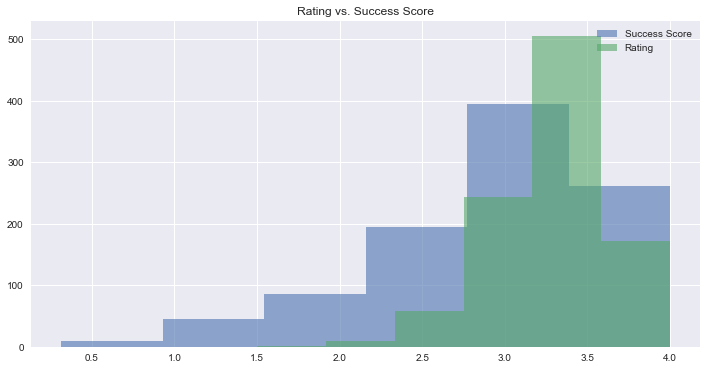

In [23]:
plt.figure(figsize=(12,6))
plt.hist(df['success_score'], bins = 6, alpha=0.6, label='Success Score')
plt.hist(df['rating'], bins = 6, alpha=0.6, label='Rating')
plt.legend(loc='upper right')
plt.title('Rating vs. Success Score')
plt.show()

## Regression Model

### Linear Regression for Success score on all features

In [24]:
X = df.drop(['rating','success_score','url','reviews_count','calories', 'carbohydrates', 'protein', 'cholesterol','sodium'], axis =1)
y = df['success_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lm = sm.OLS(y_train, X_train)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_score   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     161.9
Date:                Thu, 01 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:23:31   Log-Likelihood:                -695.17
No. Observations:                 693   AIC:                             1542.
Df Residuals:                     617   BIC:                             1887.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cooking_time                -0.0003      0.001     -0.556      0.578      -0.001       0.001
Egg                         -0.1028      0.104     -0.986      0.325      -0.308       0.102
Nut                          0.5365      0.212      2.526      0.012       0.119       0.954
Lemon                        0.1765      0.169      1.043      0.298      -0.156       0.509
Pepper                      -0.2880      0.159     -1.810      0.071      -0.600       0.024
Green Bean                  -0.1763      0.241     -0.732      0.464      -0.649       0.297
Mozzarella                  -0.0739      0.168     -0.440      0.660      -0.404       0.256
Sweet Potato/Yam             0.1668      0.192      0.870      0.385      -0.210       0.544
Yogurt                      -0.5065      0.205     -2.468      0.014      -0.910      -0.103
Parsley                      0.3865      0.191      2.020      0.044       0.011       0.762
Cheddar                     -0.3282      0.190     -1.729      0.084      -0.701       0.045
Root Vegetable               0.2995      0.201      1.489      0.137      -0.095       0.694
Chile Pepper                 0.0804      0.192      0.420      0.675      -0.296       0.457
Mint                         0.4364      0.211      2.070      0.039       0.022       0.850
Ham                          0.3229      0.197      1.641      0.101      -0.064       0.709
Almond                      -0.3398      0.277     -1.228      0.220      -0.883       0.204
Eggplant                     0.3820      0.207      1.842      0.066      -0.025       0.789
Squash                      -0.3139      0.247     -1.270      0.205      -0.799       0.172
Salmon                       0.2776      0.211      1.315      0.189      -0.137       0.692
Walnut                      -0.6435      0.229     -2.809      0.005      -1.093      -0.194
Mayonnaise                   0.0465      0.206      0.226      0.821      -0.357       0.450
Lentil                       0.4565      0.300      1.521      0.129      -0.133       1.046
Breadcrumbs                 -0.3501      0.221     -1.581      0.114      -0.785       0.085
Hominy/Cornmeal/Masa        -0.2734      0.254     -1.075      0.283      -0.773       0.226
Shallot                      0.2294      0.251      0.914      0.361      -0.264       0.722
Pine Nut                    -0.3785      0.279     -1.355      0.176      -0.927       0.170
Pecan                       -0.3873      0.360     -1.077      0.282      -1.094       0.319
Goat Cheese                  0.4461      0.233      1.914      0.056      -0.012       0.904
Artichoke                   -0.1521      0.250     -0.609      0.543      -0.643       0.338
Buttermilk                   0.4512      0.274      1.646      0.100      -0.087       0.990
Coconut       

### Predictions and Evaluations

In [25]:
from sklearn import metrics
predictions = fit.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.615515567009
MSE: 0.601928416281
RMSE: 0.775840458007


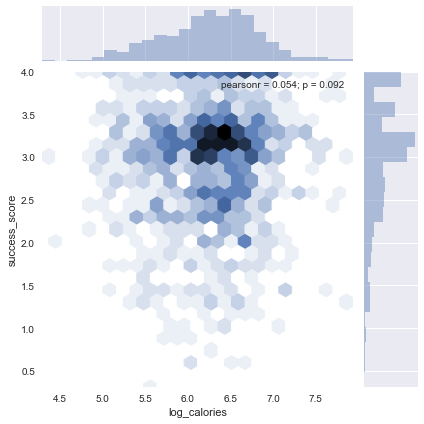

In [26]:
sns.jointplot(x=X['log_calories'],y=y,kind='hex',data=df)

### Homoscedascity analysis

Text(0,0.5,'y')

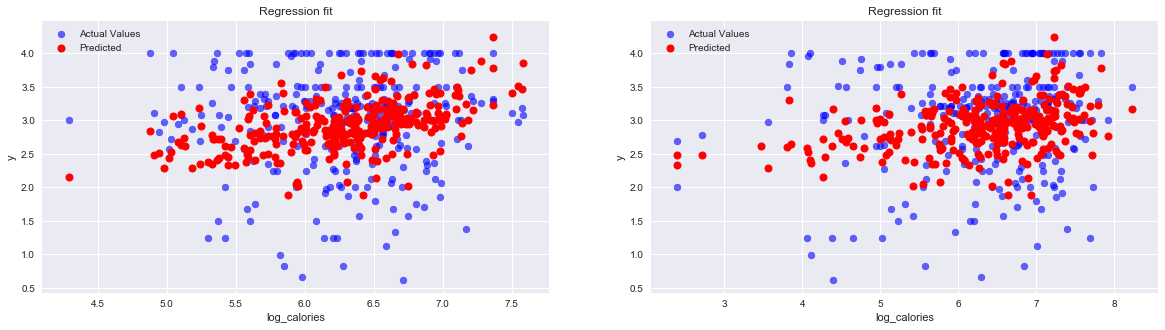

In [27]:
pred = fit.predict(X_test)
residual = fit.predict(X_test) - y_test

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.scatter(X_test['log_calories'],y_test, color = 'blue', label='Actual Values', alpha = 0.6)
plt.scatter(X_test['log_calories'], pred, color='red',linewidth=1, label='Predicted')
plt.title("Regression fit")
plt.legend(loc='upper left')
plt.xlabel("log_calories")
plt.ylabel("y")

plt.subplot(1, 2, 2)
plt.scatter(X_test['log_sodium'],y_test, color = 'blue', label='Actual Values', alpha = 0.6)
plt.scatter(X_test['log_sodium'], pred, color='red',linewidth=1, label='Predicted')
plt.title("Regression fit")
plt.legend(loc='upper left')
plt.xlabel("log_calories")
plt.ylabel("y")

Text(0,0.5,'residuals')

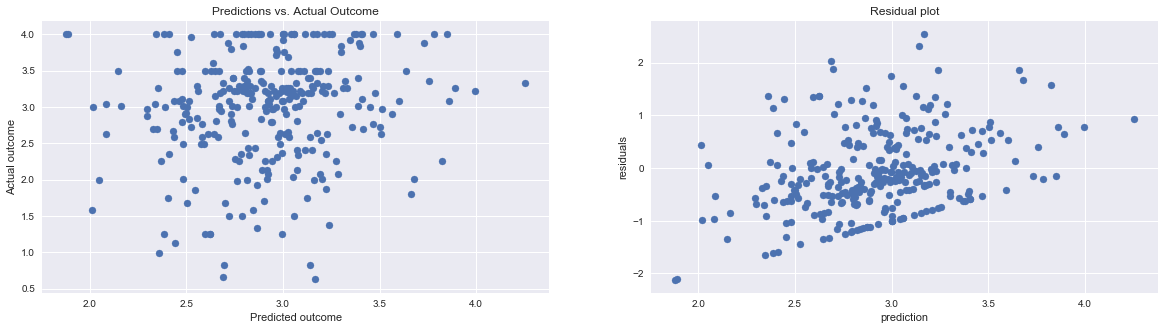

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.scatter(predictions, y_test)
plt.title('Predictions vs. Actual Outcome')
#plt.axis((0,5,0,5))
plt.ylabel('Actual outcome')
plt.xlabel('Predicted outcome')
    
plt.subplot(1, 2, 2)
residual = pred - y_test
plt.scatter(pred, residual)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")

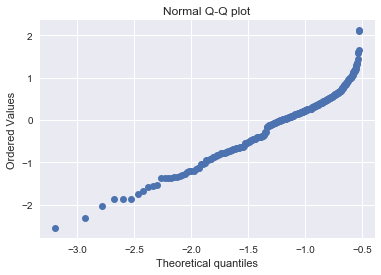

In [29]:
from scipy import stats
df['predict']=fit.predict(X_test)
df['resid']=y_test-df.predict
# We can diagnose/ inspect our residual normality assumption using qqplot:
stats.probplot(df['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [30]:
df = df.drop(['predict','resid'], 1)

Text(0,0.5,'Residuals')

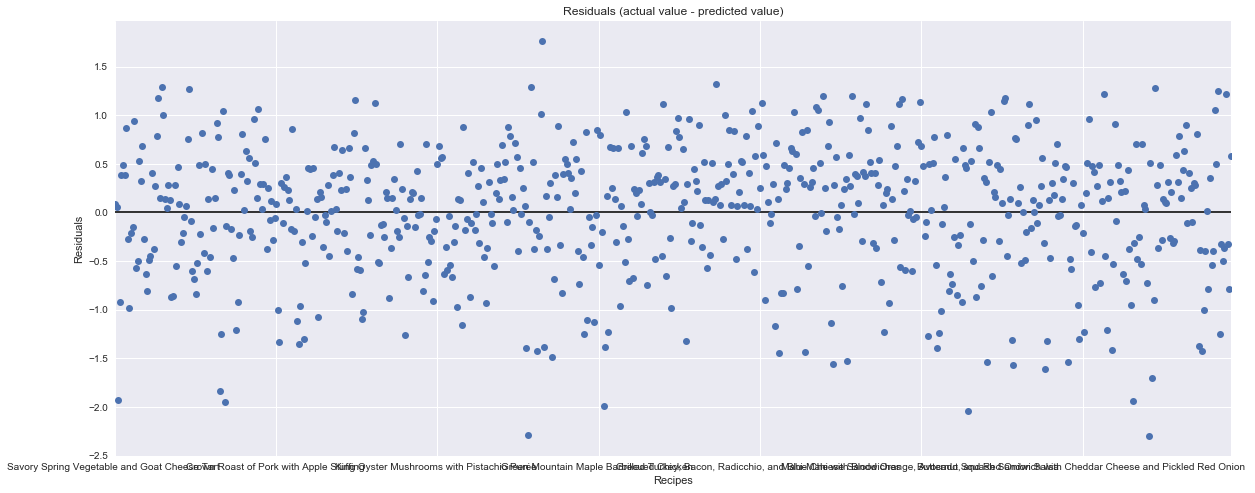

In [31]:
fit.resid.plot(style='o', figsize=(20,8))
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residuals (actual value - predicted value)')
plt.xlabel('Recipes')
plt.ylabel('Residuals')

#### Residual Histogram

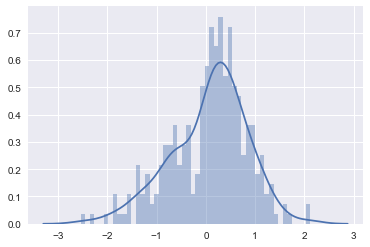

In [32]:
#residuals normal distributed
sns.distplot((y_test-predictions),bins=50);

### Cross-validation

encv: alpha = 1e-07 mean squared error = 0.460215912974
encv: alpha = 1e-06 mean squared error = 0.460205829398
encv: alpha = 1e-05 mean squared error = 0.460105984771
encv: alpha = 0.0001 mean squared error = 0.459202861737
encv: alpha = 0.001 mean squared error = 0.457168934161
encv: alpha = 0.01 mean squared error = 0.492836287672
encv: alpha = 1 mean squared error = 0.50523981935
rcv: alpha = 1e-07 mean squared error = 0.460217032153
rcv: alpha = 1e-06 mean squared error = 0.460217020945
rcv: alpha = 1e-05 mean squared error = 0.460216908868
rcv: alpha = 0.0001 mean squared error = 0.46021578823
rcv: alpha = 0.001 mean squared error = 0.460204594951
rcv: alpha = 0.01 mean squared error = 0.46009396091
rcv: alpha = 1 mean squared error = 0.455385325811
lmse: alpha = 1e-07 mean squared error = 0.460215654773
lmse: alpha = 1e-06 mean squared error = 0.460203250394
lmse: alpha = 1e-05 mean squared error = 0.460080833424
lmse: alpha = 0.0001 mean squared error = 0.459003221233
lmse: alp

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "upper_left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


Text(0.5,1,'MSE vs log(Alpha)')

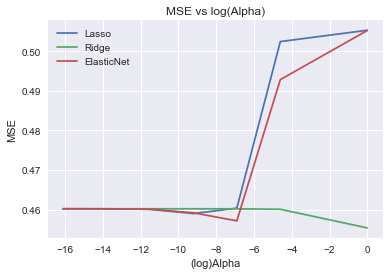

In [33]:
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
encv = ElasticNetCV(cv = 10, alphas = [1e-5,1e-3,1,1e3,1e5])



alphas = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1]
enmse = []
for a in alphas:
    encv = ElasticNetCV(cv = 10, alphas =[a])
    encv.fit(X_train,y_train)
    enmse.append(mean_squared_error(y,encv.predict(X)))
    print('encv: alpha =',a, 'mean squared error =',mean_squared_error(y,encv.predict(X)))
    
rmse = []
for a in alphas:
    rcv = RidgeCV(cv = 10, alphas =[a])
    rcv.fit(X_train,y_train)
    rmse.append(mean_squared_error(y,rcv.predict(X)))
    print('rcv: alpha =',a, 'mean squared error =',mean_squared_error(y,rcv.predict(X)))
    
lmse = []
for a in alphas:
    lcv = LassoCV(cv = 10, alphas =[a])
    lcv.fit(X_train,y_train)
    lmse.append(mean_squared_error(y,lcv.predict(X)))
    print('lmse: alpha =',a, 'mean squared error =',mean_squared_error(y,lcv.predict(X)))
    
plt.figure(figsize=(20,10))    
fig, ax = plt.subplots(1,1)
ax.plot(np.log(alphas),lmse, label='Lasso')
ax.plot(np.log(alphas),rmse, label='Ridge')
ax.plot(np.log(alphas),enmse, label = 'ElasticNet')
leg = plt.legend(loc='upper_left', fancybox=True)
plt.xlabel('(log)Alpha')
plt.ylabel('MSE')
plt.title('MSE vs log(Alpha)')

#### Ridge Regularization alpha = 0.0001

In [34]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.0001)

en.fit(X_train,y_train)
predicts = en.predict(X_test)
print(en.score(X_test, y_test))
print(np.mean((predicts - y_test)**2))

-0.0596134780804
0.5716942350061067


In [35]:
from sklearn.linear_model import Ridge
rcv = Ridge(alpha=0.1)

rcv.fit(X_train,y_train)
predicts = rcv.predict(X_test)
print (rcv.score(X_test, y_test))
print(np.mean((predicts - y_test)**2))

-0.059077831135
0.571405236916685


Text(0.5,0,'Predicted outcome')

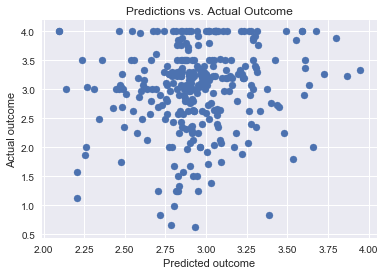

In [36]:
plt.scatter(predicts,y_test)
plt.title('Predictions vs. Actual Outcome')
plt.ylabel('Actual outcome')
plt.xlabel('Predicted outcome')



In [37]:
coeff_df = pd.DataFrame(rcv.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cooking_time,-0.000111
Egg,-0.121763
Nut,0.527229
Lemon,0.166956
Pepper,-0.329729
Green Bean,-0.170628
Mozzarella,-0.027536
Sweet Potato/Yam,0.185758
Yogurt,-0.476570
Parsley,0.381573
